<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Holt_winters_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress
import seaborn as sns

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index03-20.csv'
df = pd.read_csv(path, parse_dates=['Date'])
print(df.shape)
df.head()

(932, 3)


,Date,Conc,w_i
0,2003-01-05,26.200000,1.837894
1,2003-01-12,34.428571,2.415117
2,2003-01-19,9.428571,0.661401
3,2003-01-26,16.142857,1.132399
4,2003-02-02,6.833333,0.479349


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    932 non-null    datetime64[ns]
 1   Conc    929 non-null    float64       
 2   w_i     929 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 22.0 KB


In [59]:
df.set_index('Date', inplace=True)
df.head()

,Conc,w_i
Date,,
2003-01-05,26.200000,1.837894
2003-01-12,34.428571,2.415117
2003-01-19,9.428571,0.661401
2003-01-26,16.142857,1.132399
2003-02-02,6.833333,0.479349


In [60]:
#df['w_i'].iloc[lambda x: x == 'NaN']
df.fillna(method= 'pad', inplace=True)

In [61]:
df.iloc[80:].head(50)

,Conc,w_i
Date,,
2004-07-18,11.285714,0.836138
2004-07-25,22.333333,1.654637
2004-08-01,22.800000,1.689211
2004-08-08,23.000000,1.704029
2004-08-15,16.285714,1.206579
2004-08-22,21.142857,1.566436
2004-08-29,18.714286,1.386508
2004-09-05,22.500000,1.666985
2004-09-12,22.500000,1.666985


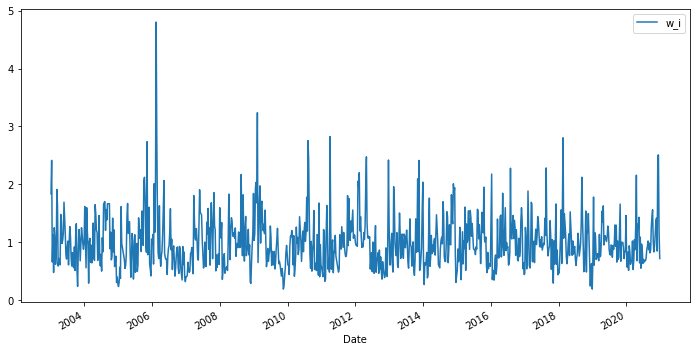

In [62]:
df[['w_i']].plot(figsize=(12,6))

In [63]:
df.index
df = df.asfreq('W')
#You must setup the frequency ts_log = ts_log.asfreq('W') https://stackoverflow.com/questions/64025453/attributeerror-rangeindex-object-has-no-attribute-inferred-freq

In [64]:
df.fillna(method= 'pad', inplace=True)

# **Decomposition**

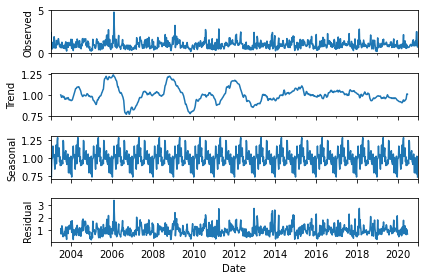

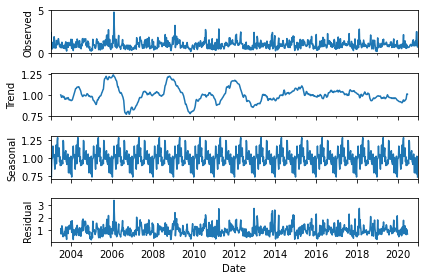

In [65]:
decompose_result = seasonal_decompose(df['w_i'], model='multiplicative')
decompose_result.plot()

# **Holt-Winters Exponential Smoothing (HWES)**

Simple Exponential Smoothing

In [66]:
df.index.freq = 'W'
m = 12
alpha = 1/(2*m)

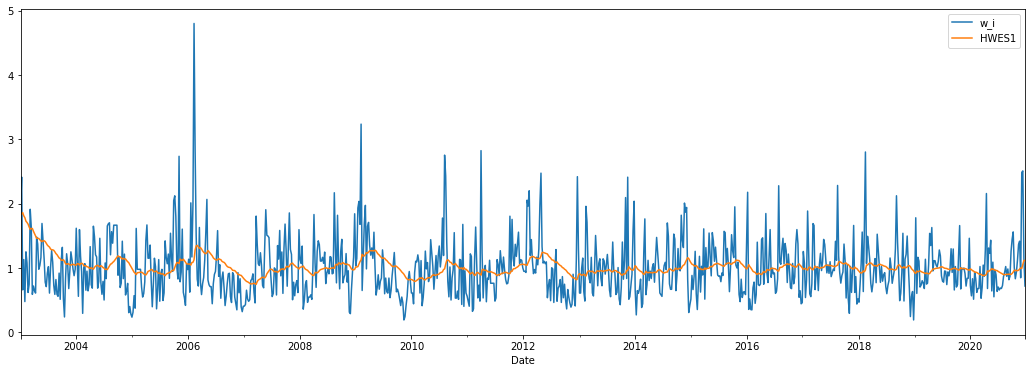

In [67]:
df['HWES1'] = SimpleExpSmoothing(df['w_i']).fit(smoothing_level = alpha, optimized = False, use_brute= True).fittedvalues
df[['w_i','HWES1']].plot(figsize = (18,6))

Exponential Smoothing

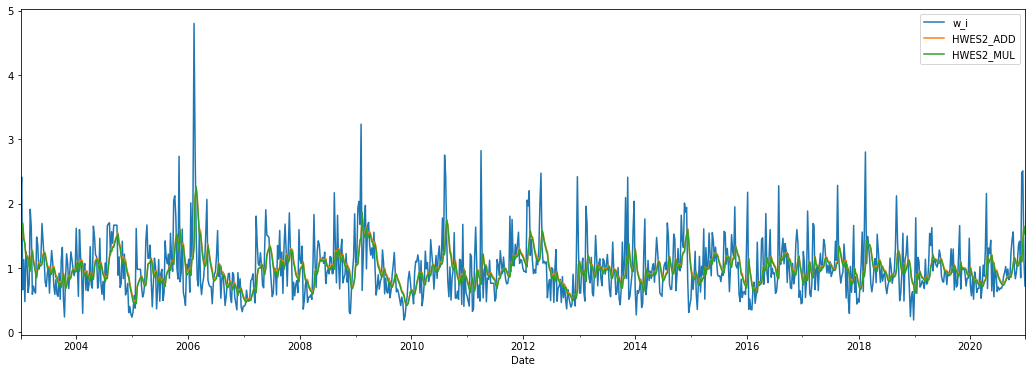

In [68]:
df['HWES2_ADD']=ExponentialSmoothing(df['w_i'], trend='add').fit().fittedvalues
df['HWES2_MUL']=ExponentialSmoothing(df['w_i'], trend='mul').fit().fittedvalues

df[['w_i','HWES2_ADD','HWES2_MUL']].plot(figsize=(18,6))

Exponential Smoothing (Triple HWES)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



LinregressResult(slope=0.42609194626281366, intercept=0.556994161387398, rvalue=0.6013693432240835, pvalue=2.030690138203735e-93, stderr=0.01849368039438704)

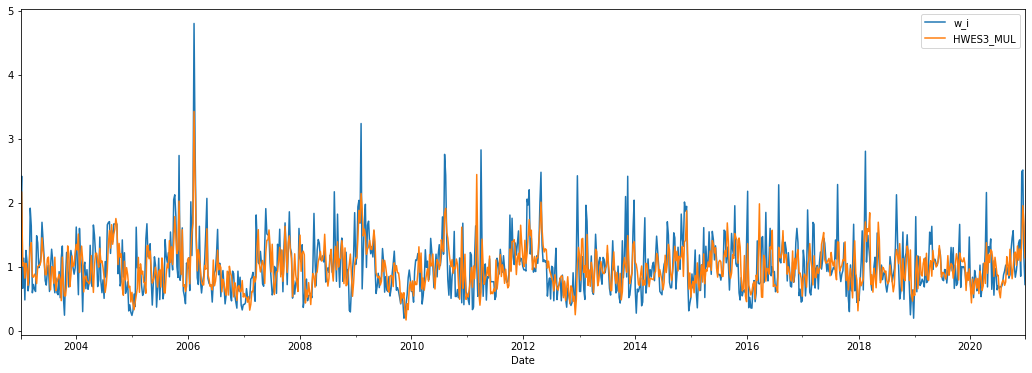

In [69]:
df['HWES3_ADD'] = ExponentialSmoothing(df['w_i'], trend='add', seasonal='add',seasonal_periods=276).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['w_i'], trend='mul', seasonal='mul',seasonal_periods=264).fit().fittedvalues
#263 264
df[['w_i',  'HWES3_MUL']].plot(figsize=(18,6))
r_value = linregress(df.w_i, df.HWES3_MUL)
r_value

LinregressResult(slope=0.4578461662766751, intercept=0.5430977468508776, rvalue=0.6072803938253396, pvalue=1.0313453999266836e-95, stderr=0.019568054165029325)

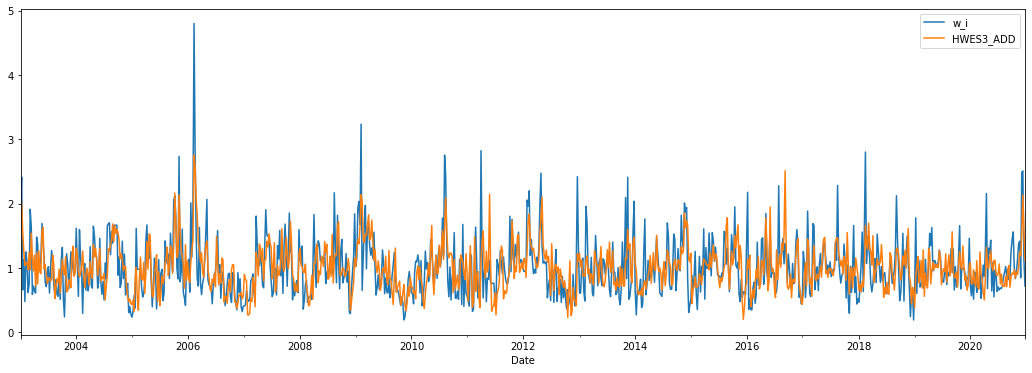

In [70]:
df[['w_i',  'HWES3_ADD']].plot(figsize=(18,6))
r_value = linregress(df.w_i, df.HWES3_ADD)
r_value

In [71]:
rms = sqrt(mean_squared_error(df.w_i, df.HWES3_MUL))
print(rms)

0.3655909908670552


In [72]:
r_value = linregress(df.w_i, df.HWES3_MUL)
r_value


LinregressResult(slope=0.42609194626281366, intercept=0.556994161387398, rvalue=0.6013693432240835, pvalue=2.030690138203735e-93, stderr=0.01849368039438704)

# **Forecasting with Triple HWES**

In [73]:
train_df = df[:620]
train_df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-10-19,26.571429,0.973920,0.995132,1.071413,1.051865,1.114713,1.163546
2014-10-26,26.142857,0.958212,0.994248,1.050353,1.029136,0.973644,1.121522
2014-11-02,49.714286,1.822173,0.992746,1.030450,1.008104,1.328427,1.161987
2014-11-09,39.000000,1.429463,1.027306,1.201472,1.187860,1.222933,1.315842
2014-11-16,36.000000,1.319505,1.044062,1.250721,1.236983,1.269035,0.846875


In [74]:
test_df = df[620:]
test_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-11-23,54.857143,2.010674,1.055539,1.265579,1.249810,1.855655,1.389381
2014-11-30,51.000000,1.869298,1.095336,1.426529,1.416416,1.624761,1.409200
2014-12-07,53.000000,1.942604,1.127585,1.522172,1.512433,1.736463,1.873357
2014-12-14,22.571429,0.827308,1.161544,1.612991,1.602873,1.656517,1.191822
2014-12-21,8.428571,0.308932,1.147617,1.443274,1.419469,1.136980,0.648265


In [75]:
test_df.tail()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2020-11-29,16.000000,0.849516,1.001656,1.189012,1.176548,1.188021,1.088109
2020-12-06,46.857143,2.487869,0.995317,1.115676,1.097486,1.505599,1.372077
2020-12-13,47.285714,2.510624,1.057506,1.412087,1.408462,2.134661,1.953580
2020-12-20,21.571429,1.145330,1.118053,1.649385,1.652849,1.599792,1.689130
2020-12-27,13.571429,0.720572,1.119189,1.540503,1.531012,1.121235,1.139905


In [76]:
train1_df= df[574:]
train1_df.head()

,Conc,w_i,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,,
2014-01-05,17.714286,0.649280,1.036970,1.304916,1.295052,1.074576,1.068231
2014-01-12,7.428571,0.272279,1.020816,1.163290,1.142348,0.962792,1.033330
2014-01-19,17.714286,0.649280,0.989627,0.970821,0.939504,0.675144,0.922888
2014-01-26,16.571429,0.607391,0.975446,0.901364,0.869084,0.584820,0.722993
2014-02-02,18.428571,0.675461,0.960110,0.837862,0.805465,0.634200,0.704272


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



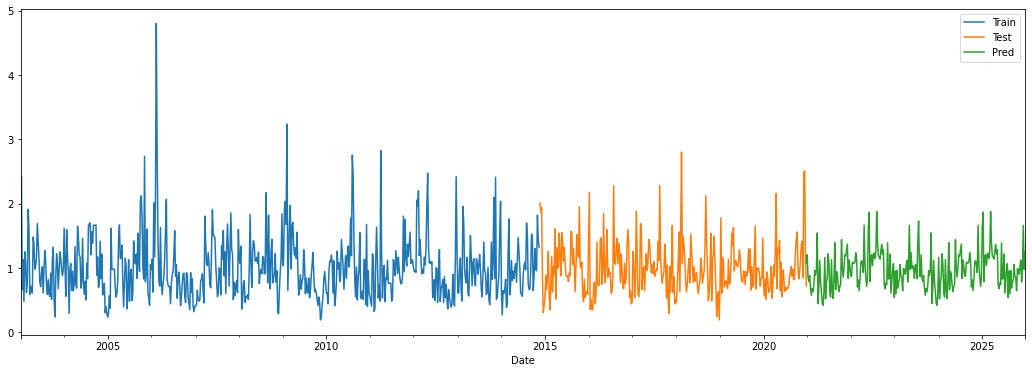

In [77]:
fitted_model = ExponentialSmoothing(test_df['w_i'], seasonal_periods=136, trend='add',seasonal='mul').fit()
test_predictions = fitted_model.forecast(312)
pred_for = fitted_model.predict(start='2020-12-27', end='2025-12-28')
#start='2020-12-27', end='2025-12-28' start='2014-11-23', end='2020-12-27'
train_df['w_i'].plot(legend=True, label='Train')
test_df['w_i'].plot(legend=True, label= 'Test', figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')
#r_value = linregress(test_df.w_i, pred_for)
#r_value
#138 136 134


In [78]:
rms = sqrt(mean_squared_error(test_df['w_i'], pred_for))
print(rms)

ValueError: ignored

In [ ]:
df.tail()

In [ ]:
df['w_i'].plot(figsize = (18,6))
pred_for.plot(legend=True, label= 'Pred')

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (12,8), dpi=180)
df['w_i'].plot(ax=ax1,
               linewidth = 0.6,
               color = 'cyan')
df['HWES3_MUL'].plot(ax=ax1,
                     linewidth = 0.6,
                     color='magenta')
ax1.set_xlabel('')
ax1.legend(labels=["Weekly index","Model"], fontsize = 'small', loc = 1, ncol = 2)
ax1.grid(axis = 'y', alpha =0.5)
ax1.text(2519, 4, '$R^2$ = 0.53 \n$RMSE$ = 0.49', fontsize = 'small')
df['w_i'].plot(ax=ax2,
               linewidth = 0.6,
               color = 'blue')
pred_for.plot(ax=ax2, 
              linewidth = 0.6,
              color='magenta')
ax2.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax2.grid(axis='y', alpha = 0.5)
ax2.legend(labels=["Weekly index","Predicted"], fontsize = 'small', loc = 1, ncol = 2)
ax2.text(2750, 4, '$RMSE$ = 0.57', fontsize = 'small')
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig8.png', dpi = 180)
plt.show()

# **ARIMA (Autoregressive Integrated Moving Average)**

In [79]:
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
autocorrelation_plot(df)

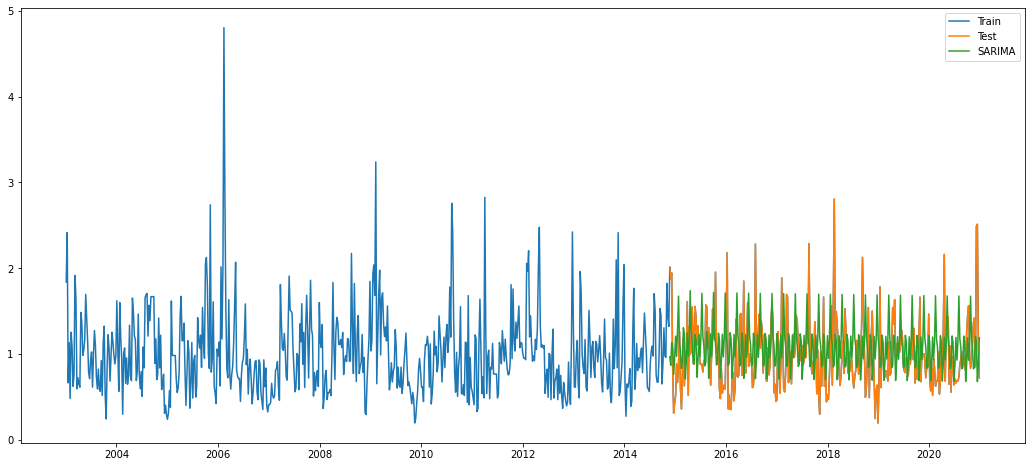

LinregressResult(slope=-0.04718362887140633, intercept=1.1300083995443202, rvalue=-0.07699141601542275, pvalue=0.1701414532347616, stderr=0.034318507466103126)

In [81]:
df_arima = test_df.copy()
fit1 = sm.tsa.statespace.SARIMAX(df.w_i, order=(1,1,1), seasonal_order=(1,1,0,12)).fit()
df_arima['SARIMA'] = fit1.predict(start = '2014-11-23', end = '2020-12-27', dynamic=True) 
plt.figure(figsize=(18,8))
plt.plot(df['w_i'], label='Train')
plt.plot(test_df['w_i'], label='Test')
plt.plot(df_arima['SARIMA'], label='SARIMA')
plt.legend()
plt.show()
r_value = linregress(test_df.w_i, df_arima['SARIMA'])
r_value

In [82]:
rms = sqrt(mean_squared_error(test_df.w_i, df_arima.SARIMA))
print(rms)

0.4936444231324422


# **Prophet**

In [85]:
from fbprophet import Prophet

In [86]:
df1 = df.drop(['Conc', 'HWES1', 'HWES2_ADD','HWES2_MUL','HWES3_ADD',	'HWES3_MUL'], axis=1)
df1.reset_index(['Date'], inplace=True)
df1.head()

,Date,w_i
0,2003-01-05,1.837894
1,2003-01-12,2.415117
2,2003-01-19,0.661401
3,2003-01-26,1.132399
4,2003-02-02,0.479349


In [87]:
df1.columns = ['ds','y']

In [88]:
df1.head()

,ds,y
0,2003-01-05,1.837894
1,2003-01-12,2.415117
2,2003-01-19,0.661401
3,2003-01-26,1.132399
4,2003-02-02,0.479349


In [89]:
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
future = m.make_future_dataframe(periods=52, freq='W')
future.tail()

,ds
986,2021-11-28
987,2021-12-05
988,2021-12-12
989,2021-12-19
990,2021-12-26


In [91]:
future.loc[937:]

,ds
937,2020-12-20
938,2020-12-27
939,2021-01-03
940,2021-01-10
941,2021-01-17
942,2021-01-24
943,2021-01-31
944,2021-02-07
945,2021-02-14
946,2021-02-21


In [92]:
pred = m.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
986,2021-11-28,0.941023,0.373929,1.550110
987,2021-12-05,0.895409,0.335456,1.443362
988,2021-12-12,0.859466,0.297085,1.410234
989,2021-12-19,0.855576,0.334476,1.416072
990,2021-12-26,0.875562,0.283691,1.440948


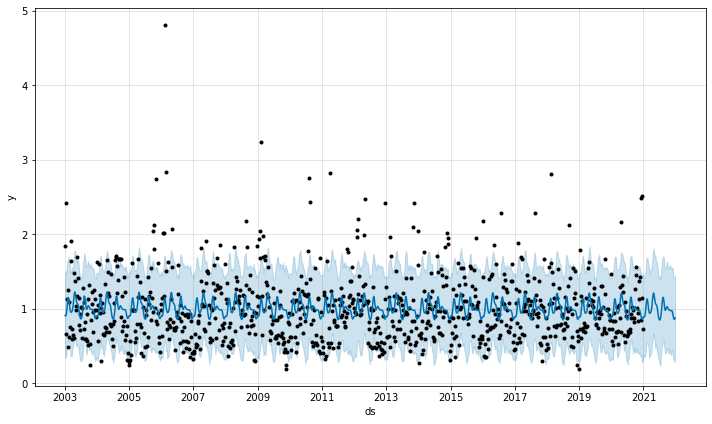

In [93]:
fig1 = m.plot(pred)

In [94]:
m1 = Prophet(seasonality_mode='multiplicative').fit(df1)
future1 = m1.make_future_dataframe(periods=260, freq = 'w')
fcst=m1.predict(future1)
fcst.tail()
#fig2=m1.plot(fcst, uncertainty=False, xlabel='years')


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1194,2025-11-23,0.989815,0.417214,1.544495,0.989412,0.990223,-0.032023,-0.032023,-0.032023,-0.032023,-0.032023,-0.032023,0.0,0.0,0.0,0.958119
1195,2025-11-30,0.989801,0.340247,1.468092,0.989397,0.990211,-0.067068,-0.067068,-0.067068,-0.067068,-0.067068,-0.067068,0.0,0.0,0.0,0.923417
1196,2025-12-07,0.989786,0.319289,1.447489,0.989382,0.990199,-0.112867,-0.112867,-0.112867,-0.112867,-0.112867,-0.112867,0.0,0.0,0.0,0.878072
1197,2025-12-14,0.989771,0.299762,1.438175,0.989367,0.990186,-0.140499,-0.140499,-0.140499,-0.140499,-0.140499,-0.140499,0.0,0.0,0.0,0.850709
1198,2025-12-21,0.989756,0.283454,1.429212,0.989351,0.990173,-0.134891,-0.134891,-0.134891,-0.134891,-0.134891,-0.134891,0.0,0.0,0.0,0.856247


In [96]:
se = np.square(fcst.loc[:, 'yhat'] - df1.y)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.4432614706953587
